In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
import sklearn.linear_model
import time
%matplotlib inline

# Downloading data directly from Google

In [ ]:
'''
Follow directions here to create an API to access the data hosted on 
the drive: https://pythonhosted.org/PyDrive/quickstart.html

Once the client_secrets.json file is in ./Marin Workspace/ run the code 
below just once
'''
gauth = GoogleAuth()
gauth.LocalWebserverAuth()

In [ ]:
'''
Run the following code to download the data using the file's ID
'''
all_stocks_5yr = '1jpwvbmAjtqZJaRaTdJ4sWHyBDL6V8hzK'
drive = GoogleDrive(gauth)
data = drive.CreateFile({'id': all_stocks_5yr})
data.GetContentFile('all_stocks_5yr.csv')

# Load stock data and sector data and concatanate the two

In [121]:
stock_data = pd.read_csv('all_stocks_5yr.csv', index_col = 'Name')
sector_data = pd.read_csv('sectors.csv', index_col = 'Symbol')

In [144]:
stock_data.head(5)

,date,open,high,low,close,volume
Name,,,,,,
AAL,2013-02-08,15.07,15.12,14.63,14.75,8407500
AAL,2013-02-11,14.89,15.01,14.26,14.46,8882000
AAL,2013-02-12,14.45,14.51,14.10,14.27,8126000
AAL,2013-02-13,14.30,14.94,14.25,14.66,10259500
AAL,2013-02-14,14.94,14.96,13.16,13.99,31879900


In [145]:
sector_data.head(5)

,Name,Sector
Symbol,,
MMM,3M Company,Industrials
AOS,A.O. Smith Corp,Industrials
ABT,Abbott Laboratories,Health Care
ABBV,AbbVie Inc.,Health Care
ACN,Accenture plc,Information Technology


In [122]:
#Check for empty entries
stock_data.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [123]:
#Check for empty entries
sector_data.isnull().sum()

Name      0
Sector    0
dtype: int64

In [124]:
#Drop rows with empty values
stock_data.dropna(inplace = True) 

In [126]:
#Combine the two dataframe's based off stock symbol (ticker)
df = pd.concat([stock_data, sector_data], axis = 1, join_axes=[stock_data.index])
#Rename the 'Name' column to 'full_name'
df.rename(columns={'Name':'full_name'}, inplace = True)
#Reset current index and change so that we're able to slice by time
df.reset_index(inplace = True)
df.set_index('date', inplace = True)

In [141]:
#Sanity check. There should be 11 sectors
len(list(df.groupby('Sector')))

11

In [223]:
df

,Name,open,high,low,close,volume,full_name,Sector
date,,,,,,,,
2013-02-08,AAL,15.07,15.1200,14.6300,14.75,8407500,American Airlines Group,Industrials
2013-02-11,AAL,14.89,15.0100,14.2600,14.46,8882000,American Airlines Group,Industrials
2013-02-12,AAL,14.45,14.5100,14.1000,14.27,8126000,American Airlines Group,Industrials
2013-02-13,AAL,14.30,14.9400,14.2500,14.66,10259500,American Airlines Group,Industrials
2013-02-14,AAL,14.94,14.9600,13.1600,13.99,31879900,American Airlines Group,Industrials
2013-02-15,AAL,13.93,14.6100,13.9300,14.50,15628000,American Airlines Group,Industrials
2013-02-19,AAL,14.33,14.5600,14.0800,14.26,11354400,American Airlines Group,Industrials
2013-02-20,AAL,14.17,14.2600,13.1500,13.33,14725200,American Airlines Group,Industrials
2013-02-21,AAL,13.62,13.9500,12.9000,13.37,11922100,American Airlines Group,Industrials


In [159]:
#Check for missing data
df.isnull().sum()

Name            0
open            0
high            0
low             0
close           0
volume          0
full_name    8813
Sector       8813
dtype: int64

In [162]:
#Drop missing rows
df.dropna(inplace = True)

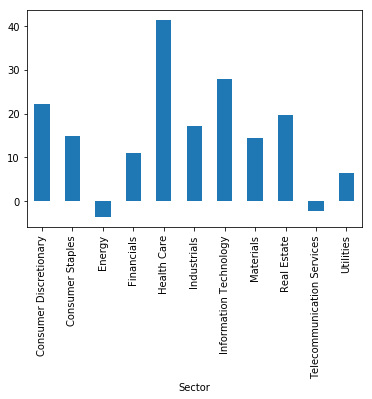

In [245]:
(df['2015'].groupby('Sector').close.mean() - df['2013'].groupby('Sector').close.mean()).plot(kind = 'bar')

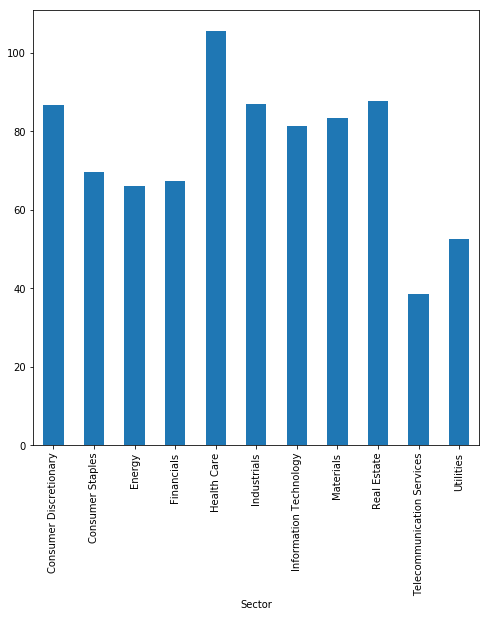

In [163]:
#Bar graph of mean close price for sectors
df.groupby('Sector').close.mean().plot(kind='bar', figsize = (8,8))

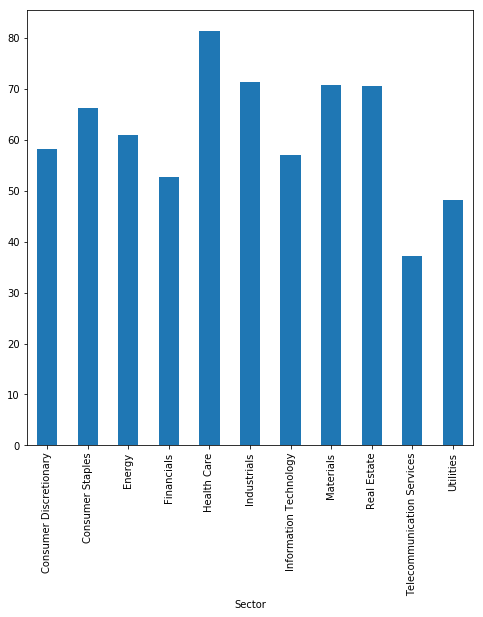

In [164]:
#Bar graph of median close prices
df.groupby('Sector').close.median().plot(kind = 'bar', figsize = (8,8))

In [173]:
sectors_and_companies = dict(df.groupby('Sector').full_name.unique())

In [177]:
sectors_and_companies.keys()

dict_keys(['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', 'Health Care', 'Industrials', 'Information Technology', 'Materials', 'Real Estate', 'Telecommunication Services', 'Utilities'])

In [198]:
sum(map(len, sectors_and_companies.values()))

498

In [201]:
list(map(len, sectors_and_companies.values()))

[81, 34, 31, 68, 60, 67, 70, 25, 31, 3, 28]

In [222]:
sectors_and_companies.keys()
sectors_and_companies['Consumer Staples'][1]

'Brown-Forman Corp.'

In [214]:
check

[<function ndarray.any>,
 <function ndarray.any>,
 <function ndarray.any>,
 <function ndarray.any>,
 <function ndarray.any>,
 <function ndarray.any>,
 <function ndarray.any>,
 <function ndarray.any>,
 <function ndarray.any>,
 <function ndarray.any>,
 <function ndarray.any>]

In [235]:
aapl_df = df[df['Name'] == 'AAPL']


X = (aapl_df.index - aapl_df.index[0]).days.values.reshape(-1,1)
y = aapl_df['close'].values.reshape(-1,1)


lin_reg_model = sklearn.linear_model.LinearRegression()


lin_reg_model.fit(X,y)


#From 2-8-13 to 4-15-18: 1892 days
lin_reg_model.predict(1893)

(1259, 1) (1259, 1)


array([[ 159.14794957]])

In [149]:
stock_data.reset_index(inplace = True)

In [150]:
stock_data.set_index('date', inplace = True)

In [153]:
sector_data.reset_index(inplace = True)

In [157]:
#Find the intersection of tickers between the two data sets
#Findings: there's missing data
stocks = set(stock_data.Name.unique())
sector = set(sector_data.Symbol.unique())

start = time.time()
intersection3 = [symbol for symbol in stocks if symbol in sector]
end = time.time()
print(len(intersection3))
print(end-start)

start = time.time()
intersection = [symbol for symbol in sector if symbol in stocks]
print(len(intersection))
end = time.time()
print(end-start)

start = time.time()
intersection2 = stocks.intersection(sector)
print(len(intersection2))
end = time.time()
print(end-start)   

498
0.00016999244689941406
498
0.00039696693420410156
498
0.00047588348388671875


In [ ]:
# for row,column in sectors.iterrows():
#     for stock in stock_data.Name.unique():
#         if stock == column.Symbol:
#             print(stock, column.Name, column.Sector)

start = time.time()
for row1, column1 in sectors.iterrows():
    for row2, column2 in stock_data.iterrows():
        if column1.Symbol == column2.Name:
            column2.sector = column1.sector
            #print(column2.Name, column1.Name, column1.Sector)
end = time.time()
print(end-start)